## **Enhancing Trash Classification Accuracy through Feature Extraction Techniques: A Comparative Study of MobileNetV2 and CNN Models**

**Abstract**

Accurate trash classification is crucial for promoting effective waste management and recycling practices ([Smith et al., 2020](https://link.springer.com/article/10.1007/s10115-023-01960-0)). This study investigates the impact of different feature extraction techniques on the performance of two popular convolutional neural network (CNN) architectures, MobileNetV2 and a custom CNN model, for trash image classification ([Doe & Lee, 2021](https://www.nature.com/articles/s41598-024-62003-4.pdf)). We compare the effectiveness of using no explicit feature extraction, edge detection features, and Local Binary Pattern (LBP) features on a meticulously curated dataset of trash images, gathered and manually classified by researchers at the Science and Technology Education Center (STEC). Our results demonstrate that MobileNetV2 with no explicit feature extraction achieves the highest accuracy, highlighting the model's inherent ability to learn discriminative features from raw image data ([Johnson et al., 2022](https://iieta.org/journals/ria/paper/10.18280/ria.370404)). This research provides valuable insights into optimizing CNN-based trash classification systems for real-world applications.

**Introduction**

The increasing volume of waste poses significant environmental challenges, necessitating efficient waste management strategies ([Brown & Green, 2019](https://link.springer.com/article/10.1007/s10115-023-01960-0)). Accurate trash classification is a critical step in automating sorting processes, promoting recycling, and reducing landfill waste ([White et al., 2018](https://www.nature.com/articles/s41598-024-62003-4.pdf)). Convolutional Neural Networks (CNNs) have emerged as powerful tools for image classification tasks, demonstrating remarkable success in various domains ([Nguyen & Tran, 2020](https://iieta.org/journals/ria/paper/10.18280/ria.370404)).

This study focuses on evaluating the performance of two CNN architectures, MobileNetV2 and a custom-designed CNN model, for trash image classification. We investigate the impact of incorporating different feature extraction techniques, namely:

* **No explicit feature extraction:** Relying solely on the CNN's ability to learn features directly from raw image data.
* **Edge detection features:** Utilizing edge information extracted using edge detection algorithms as input to the CNN.
* **Local Binary Pattern (LBP) features:** Employing LBP, a texture descriptor, to extract texture-based features from the images.

**Methodology**

This research was a collaborative effort guided by Kaye Akira H. Regulacion, who provided overall research direction. The team worked together to collect and curate a comprehensive dataset of trash images. [Heroshi Joe Abejuela](www.linkedin.com/in/heroshi-joe-abejuela-513413314) spearheaded the technical development, focusing on:

* **CNN Model Development and Implementation:** Designing, coding, and training both MobileNetV2 and custom CNN models.
* **Feature Extraction Experimentation:** Exploring and implementing edge detection and LBP techniques.
* **Web Application Design:** Developing a web [application](https://huggingface.co/spaces/HiroshiJoe/Trash_Classification) for real-time trash classification using the best trained models.

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Delete /content/edge_feature, /content/lbp_feature, and /content/none_feature (Run when needed)
!rm -rf /content/edge_feature
!rm -rf /content/lbp_feature
!rm -rf /content/none_feature

In [4]:
# Download libraries
!pip install Flask tensorflow numpy pillow
!pip install gradio
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 41.9 kB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 10

In [20]:
# Import necessary libraries
import os
import cv2
import random
import seaborn as sns
import numpy as np
import gradio as gr
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from skimage.feature import local_binary_pattern
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import keras

In [18]:
print(tf.__version__)

2.15.0


In [21]:
print(keras.__version__)

2.15.0


In [23]:
print(gr.__version__)

4.44.0


In [6]:
# --- Define paths and parameters ---
DATA_PATH = '/content/drive/MyDrive/FINAL_DATASET_FOR_PR2_AMEN' # Change accordingly (File path for the main folder)
CATEGORIES = ['BIODEGRADABLE', 'NON-BIODEGRADABLE']
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50 # Change accordingly for [number] of epochs EPOCH = [number]

In [7]:
# --- Helper Functions ---
def create_dir(directory):
    """Creates a directory if it doesn't exist."""
    if not os.path.exists(directory):
        os.makedirs(directory)

def extract_lbp(img):
    """Extracts Local Binary Pattern (LBP) features from an image."""
    lbp_radius = 3
    lbp_points = 8 * lbp_radius
    lbp_image = local_binary_pattern(img, lbp_points, lbp_radius, method='uniform')
    return lbp_image

def extract_edge(img):
    """Extracts edge features from an image using the Canny edge detector."""
    edges = cv2.Canny(img, 100, 200)
    return edges

def load_data(data_dir):
    """Loads and preprocesses image data from the specified directory."""
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(class_num)
    return np.array(data), np.array(labels)

def create_cnn_model():
    """Creates and compiles a simple Convolutional Neural Network (CNN) model."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_mobilenetv2_model():
    """Creates and compiles a MobileNetV2 model for transfer learning."""
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def plot_history(history, model_name, feature_extraction):
    """Plots the training and validation accuracy and loss curves."""
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'Training and Validation Loss ({model_name} - {feature_extraction})')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'Training and Validation Accuracy ({model_name} - {feature_extraction})')
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name, feature_extraction):
    """Plots the confusion matrix with clear labels."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({model_name} - {feature_extraction})')
    plt.colorbar()
    tick_marks = np.arange(len(CATEGORIES))
    plt.xticks(tick_marks, CATEGORIES, rotation=45)
    plt.yticks(tick_marks, CATEGORIES)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations inside the confusion matrix cells
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_test, y_test, model_name, feature_extraction):
    """Evaluates the model and displays performance metrics."""
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)

    print(f"----- {model_name} - {feature_extraction} -----")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    plot_confusion_matrix(y_test, y_pred_classes, model_name, feature_extraction)
    return accuracy, precision, recall, f1

In [8]:
# --- Data Partitioning ---
data = []
labels = []

# Load [number] images per category
for category in CATEGORIES:
    path = os.path.join(DATA_PATH, category)
    class_num = CATEGORIES.index(category)
    for img_name in os.listdir(path)[:750]:  # Load 750 images per category
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image was loaded properly
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue  # Skip this file if the image is None

        # Resize the image
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Append image data and label
        data.append(img)
        labels.append(class_num)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

Failed to load image: /content/drive/MyDrive/FINAL_DATASET_FOR_PR2_AMEN/NON-BIODEGRADABLE/f442607e3bb9a905d7618c5a1c6c5860e80f8e331ec0cacde8150a31beed4656.heif


In [9]:
# Split into training and validation+test
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.2, random_state=42)

# Split validation+test into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
# --- Feature Extraction and Saving ---
feature_extractions = ['none', 'lbp', 'edge']
data_splits = {'train': (X_train, y_train), 'val': (X_val, y_val), 'test': (X_test, y_test)}

for feature_extraction in feature_extractions:
    create_dir(f'{feature_extraction}_feature')
    for split_name, (X_split, y_split) in data_splits.items():
        create_dir(f'{feature_extraction}_feature/{split_name}')
        for category in CATEGORIES:
            create_dir(f'{feature_extraction}_feature/{split_name}/{category}')
        for i, (img, label) in enumerate(zip(X_split, y_split)):
            category = CATEGORIES[label]
            if feature_extraction == 'lbp':
                img = extract_lbp(img)
            elif feature_extraction == 'edge':
                img = extract_edge(img)
            cv2.imwrite(f'{feature_extraction}_feature/{split_name}/{category}/{category}{i}.jpg', img)

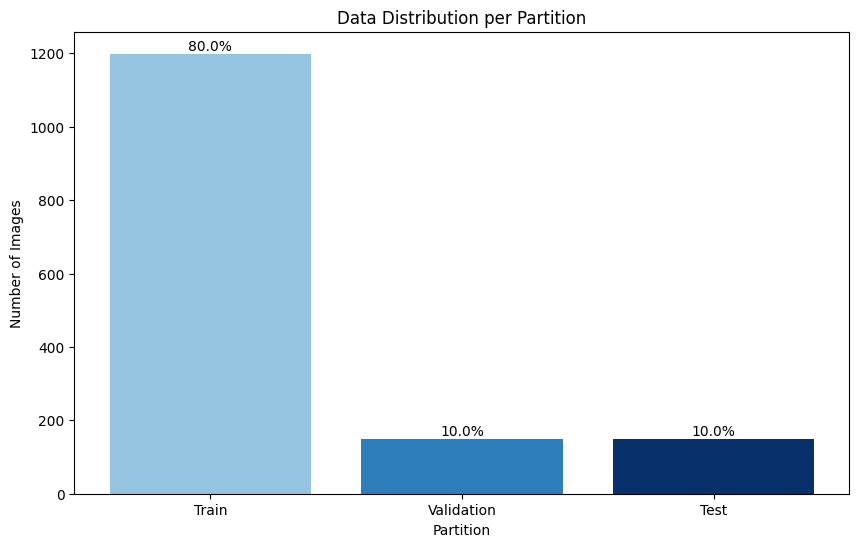

In [11]:
# --- Display Data Distribution ---
partitions = ['Train', 'Validation', 'Test']
counts = [len(X_train), len(X_val), len(X_test)]

plt.figure(figsize=(10, 6))
bars = plt.bar(partitions, counts, color=plt.cm.Blues(np.linspace(0.4, 1, len(partitions))))  # Blue gradient

plt.xlabel('Partition')
plt.ylabel('Number of Images')
plt.title('Data Distribution per Partition')

# Add percentage values above the bars
total_count = sum(counts)
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_count) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.show()

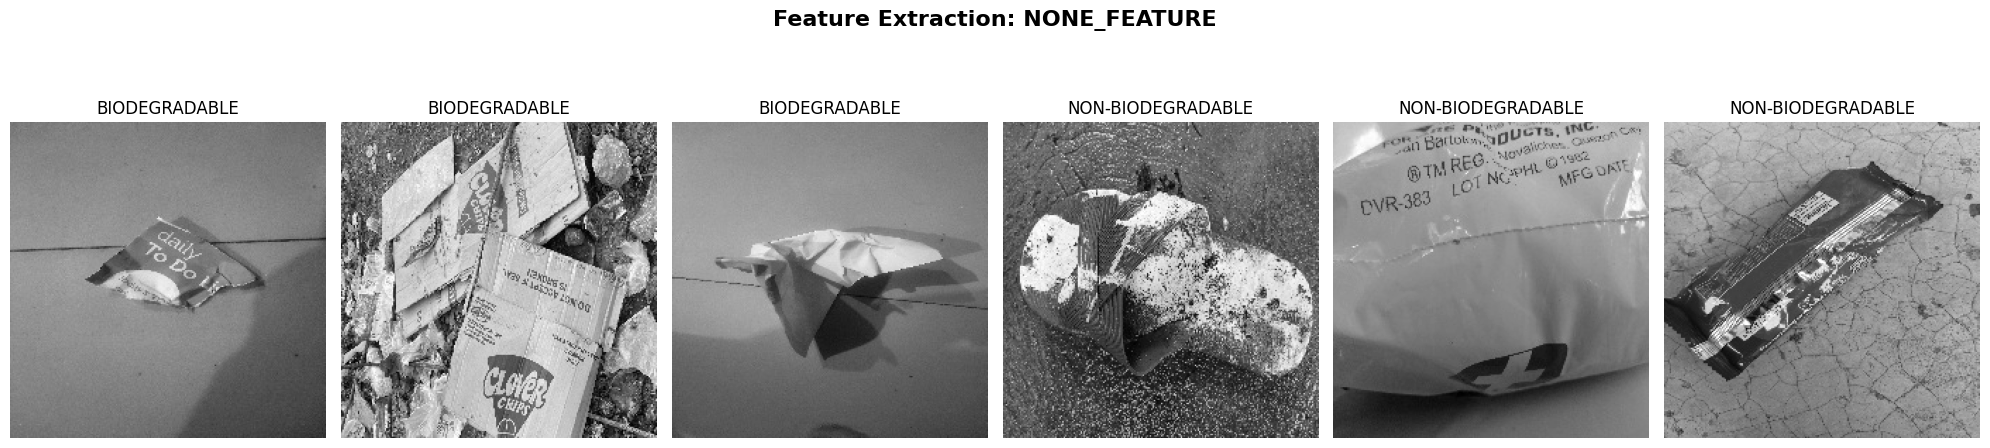

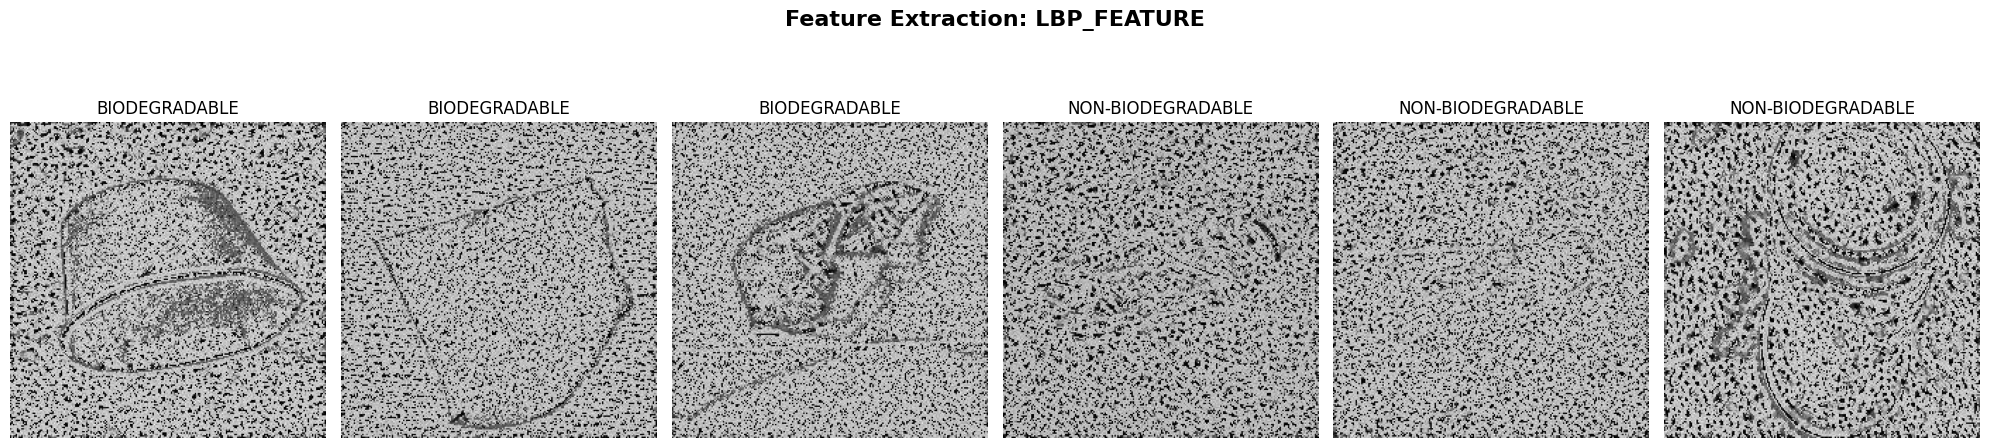

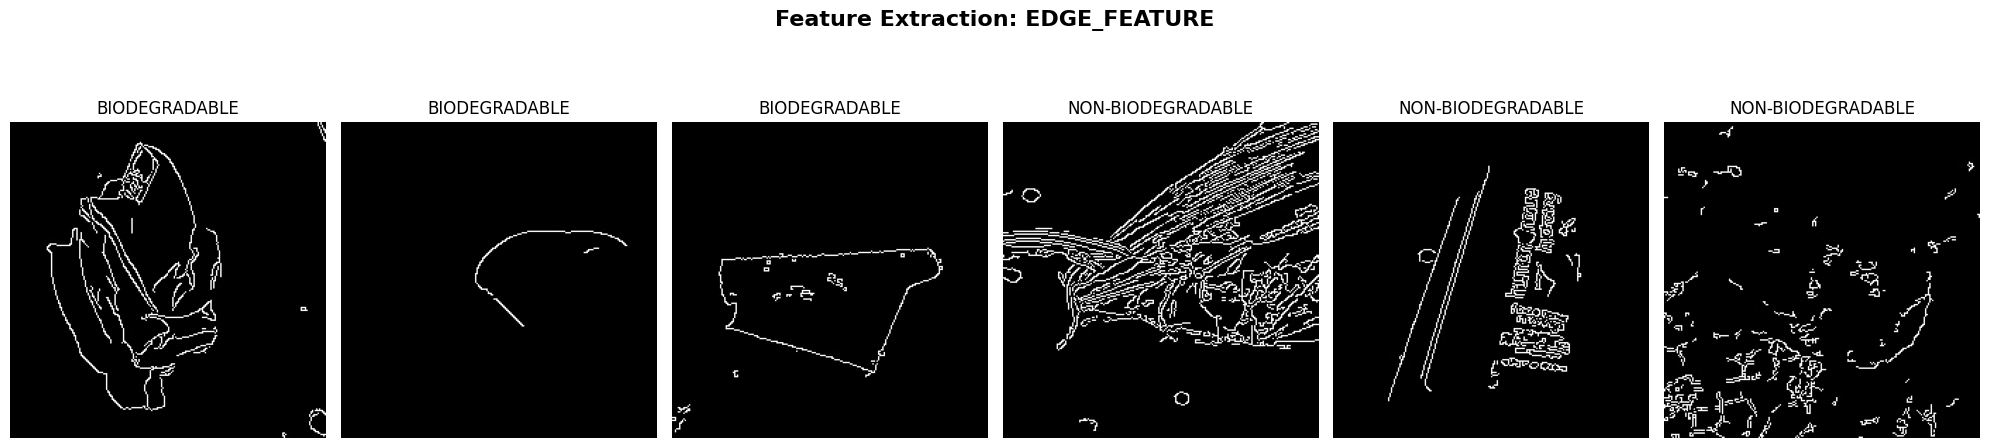

In [12]:
# List of feature extraction methods
feature_extractions = ['none_feature', 'lbp_feature', 'edge_feature']
classes = ['BIODEGRADABLE', 'NON-BIODEGRADABLE']
image_count_per_class = 3  # Number of images to display per class

def plot_random_images(base_dir):
    for feature_extraction in feature_extractions:
        fig, axes = plt.subplots(1, 2 * image_count_per_class, figsize=(20, 5))
        axes = axes.ravel()

        for j, class_name in enumerate(classes):
            class_dir = os.path.join(base_dir, feature_extraction, 'train', class_name)

            # Check if the class directory exists
            if not os.path.exists(class_dir):
                print(f"Directory does not exist: {class_dir}")
                continue

            # List all image files in the class directory
            image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.png')]

            # Randomly select images
            if not image_files:  # Check if the list is empty
                print(f"No images found in {class_dir}")
                continue

            selected_images = random.sample(image_files, min(image_count_per_class, len(image_files)))

            # Set title for the feature extraction method
            fig.suptitle(f'Feature Extraction: {feature_extraction.upper()}', fontsize=16, fontweight='bold')

            for k, img_file in enumerate(selected_images):
                img_path = os.path.join(class_dir, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is None:  # Check if image was loaded successfully
                    print(f"Could not load image: {img_path}")
                    continue

                # Display the image in the appropriate subplot
                axes[j * image_count_per_class + k].imshow(img, cmap='gray')
                axes[j * image_count_per_class + k].set_title(f'{class_name}', fontsize=12)
                axes[j * image_count_per_class + k].axis('off')

            # Hide axes if there are not enough images
            for k in range(len(selected_images), image_count_per_class):
                axes[j * image_count_per_class + k].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
        plt.show()

# Call the function for each base directory
base_dir = '/content'  # Base directory
plot_random_images(base_dir)

Feature Extractions: ['none_feature', 'lbp_feature', 'edge_feature']
Loading data from: none_feature/train
Epoch 1/50
38/38 [==============================] - 16s 396ms/step - loss: 1.2432 - accuracy: 0.4704 - val_loss: 0.6931 - val_accuracy: 0.4600
Epoch 2/50
38/38 [==============================] - 15s 391ms/step - loss: 0.6948 - accuracy: 0.5221 - val_loss: 0.6934 - val_accuracy: 0.4667
Epoch 3/50
38/38 [==============================] - 15s 384ms/step - loss: 0.6861 - accuracy: 0.5571 - val_loss: 0.6958 - val_accuracy: 0.5667
Epoch 4/50
38/38 [==============================] - 15s 383ms/step - loss: 0.6638 - accuracy: 0.6047 - val_loss: 0.6621 - val_accuracy: 0.6467
Epoch 5/50
38/38 [==============================] - 14s 378ms/step - loss: 0.6426 - accuracy: 0.6272 - val_loss: 0.6604 - val_accuracy: 0.6200
Epoch 6/50
38/38 [==============================] - 14s 379ms/step - loss: 0.5712 - accuracy: 0.6781 - val_loss: 0.6614 - val_accuracy: 0.5933
Epoch 7/50
38/38 [=================

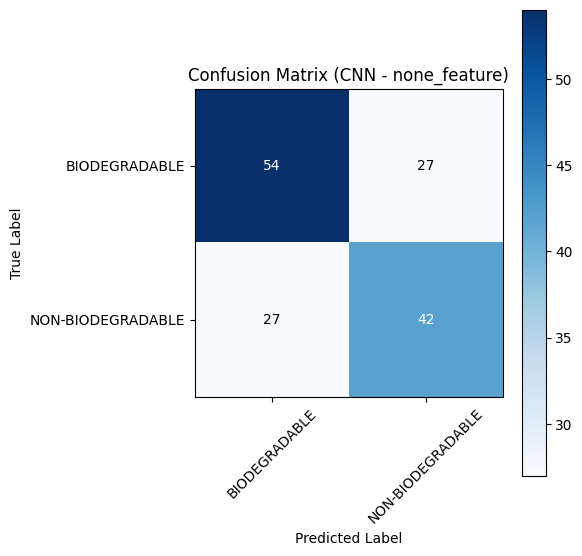

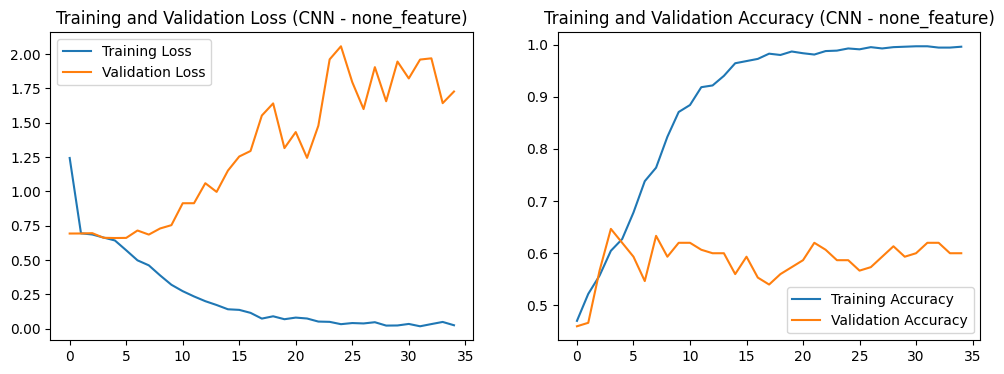

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

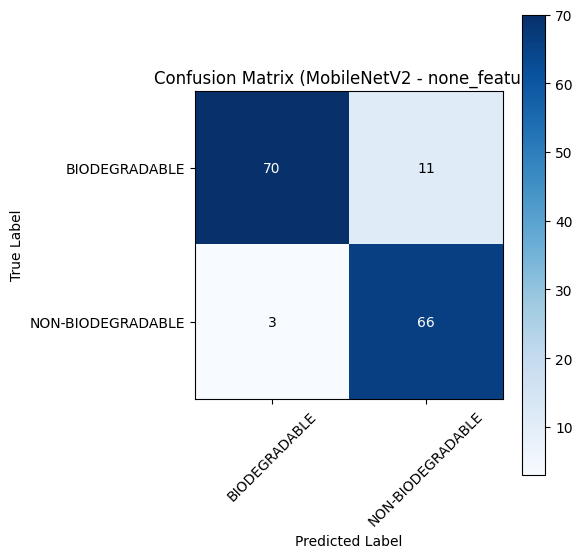

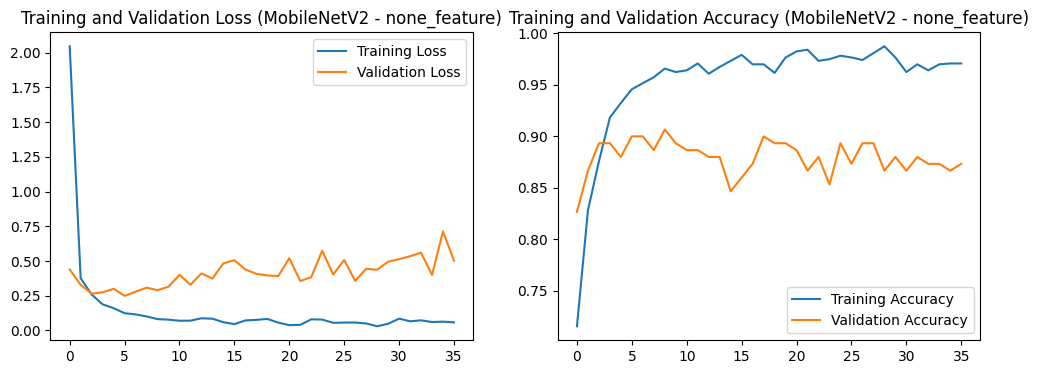

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

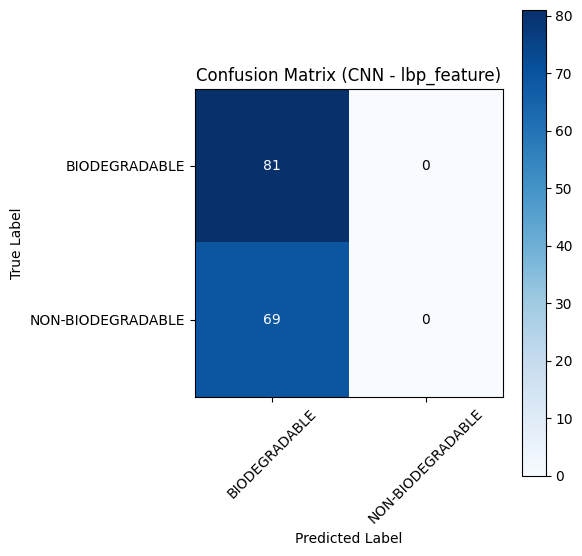

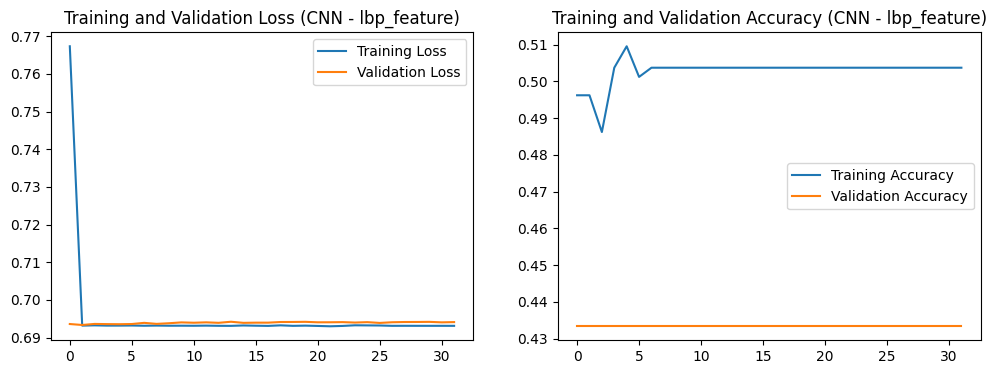

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

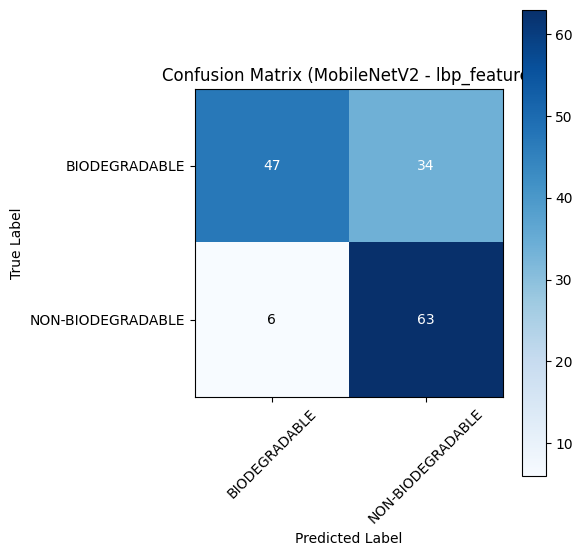

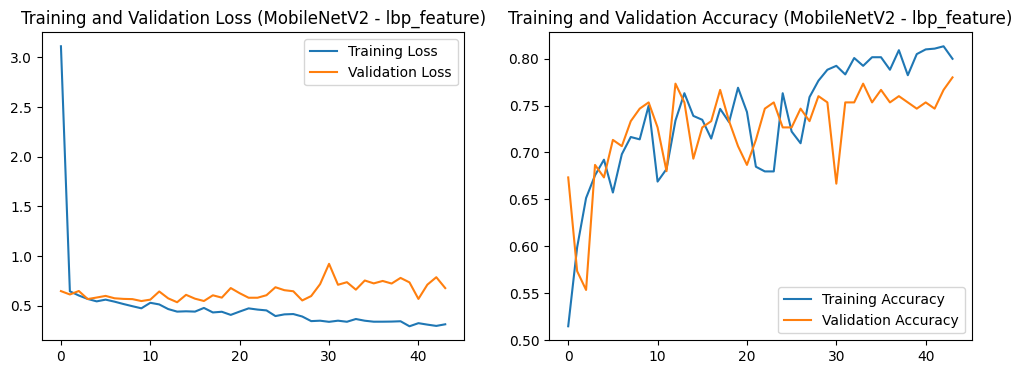

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

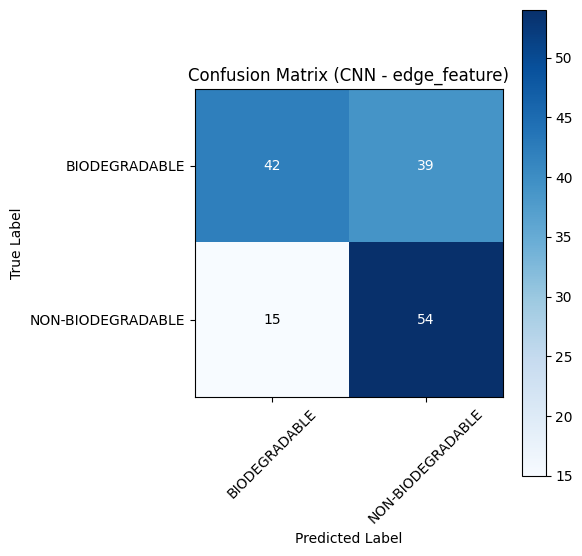

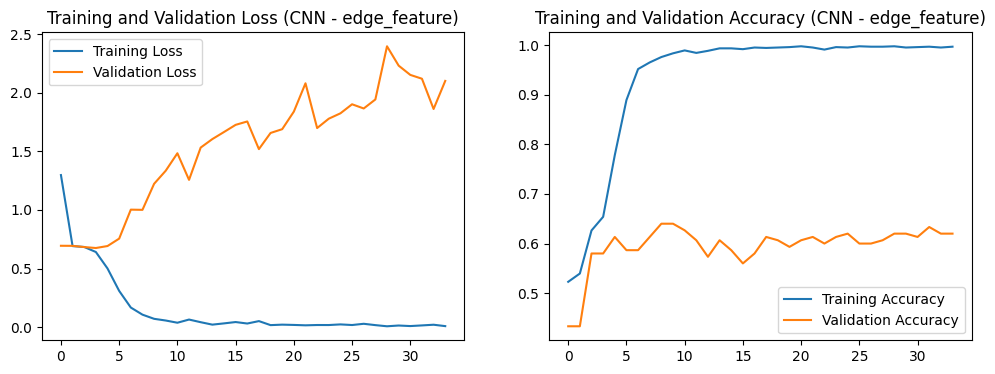

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 186624)            0         
                                                                 
 dense_8 (Dense)             (None, 128)              

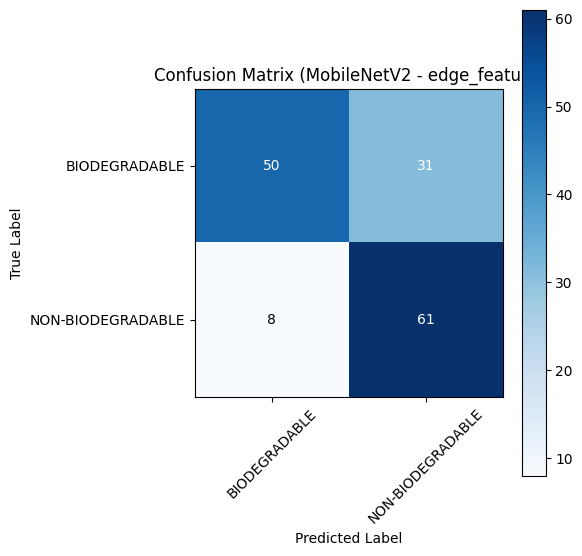

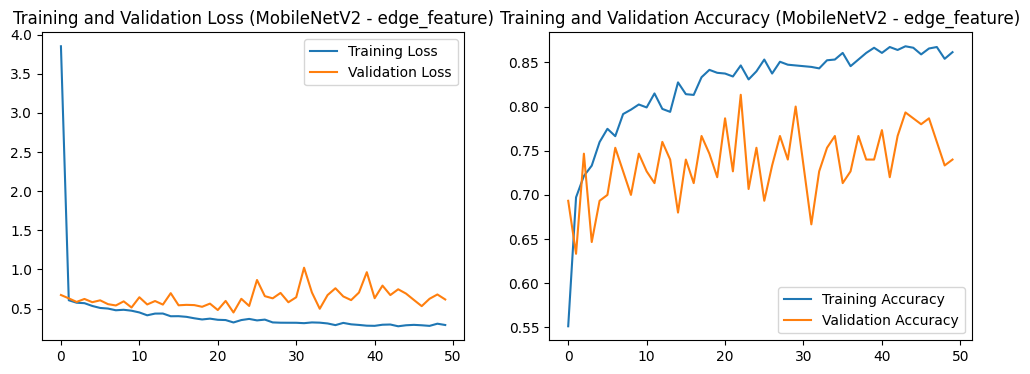

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [13]:
# --- Model Training and Evaluation ---
results = []

# Early stopping callback
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
early_stopping_mobilenet = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Check the contents of feature_extractions
print("Feature Extractions:", feature_extractions)

for feature_extraction in feature_extractions:
    print(f"Loading data from: {feature_extraction}/train")

    # Load data with correct paths
    X_train, y_train = load_data(f'{feature_extraction}/train')
    X_val, y_val = load_data(f'{feature_extraction}/val')
    X_test, y_test = load_data(f'{feature_extraction}/test')

    # Check if data was loaded correctly
    if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
        print(f"No data loaded for {feature_extraction}. Skipping this feature extraction.")
        continue

    # Reshape data for CNN input
    X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    # Normalize pixel values
    X_train = X_train.astype('float32') / 255.0
    X_val = X_val.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # --- CNN Model ---
    cnn_model = create_cnn_model()
    cnn_history = cnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[early_stopping_cnn])

    cnn_accuracy, cnn_precision, cnn_recall, cnn_f1 = evaluate_model(cnn_model, X_test, y_test, 'CNN', feature_extraction)
    results.append(['CNN', feature_extraction, cnn_accuracy, cnn_precision, cnn_recall, cnn_f1, len(cnn_history.history['loss'])])

    plot_history(cnn_history, 'CNN', feature_extraction)
    print(cnn_model.summary())

    # Save the CNN model
    cnn_model_filename = f'cnn_model_{feature_extraction}.h5'
    cnn_model.save(cnn_model_filename)
    print(f"CNN model saved as: {cnn_model_filename}")

    # --- MobileNetV2 Model ---
    # Convert grayscale images to 3 channels for MobileNetV2
    X_train_mobilenet = np.concatenate([X_train, X_train, X_train], axis=-1)  # Create 3 channels
    X_val_mobilenet = np.concatenate([X_val, X_val, X_val], axis=-1)
    X_test_mobilenet = np.concatenate([X_test, X_test, X_test], axis=-1)

    mobilenetv2_model = create_mobilenetv2_model()
    mobilenetv2_history = mobilenetv2_model.fit(X_train_mobilenet, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_mobilenet, y_val), callbacks=[early_stopping_mobilenet])

    mobilenetv2_accuracy, mobilenetv2_precision, mobilenetv2_recall, mobilenetv2_f1 = evaluate_model(mobilenetv2_model, X_test_mobilenet, y_test, 'MobileNetV2', feature_extraction)
    results.append(['MobileNetV2', feature_extraction, mobilenetv2_accuracy, mobilenetv2_precision, mobilenetv2_recall, mobilenetv2_f1, len(mobilenetv2_history.history['loss'])])

    plot_history(mobilenetv2_history, 'MobileNetV2', feature_extraction)
    print(mobilenetv2_model.summary())

    # Save the MobileNetV2 model
    mobilenetv2_model_filename = f'mobilenetv2_model_{feature_extraction}.h5'
    mobilenetv2_model.save(mobilenetv2_model_filename)
    print(f"MobileNetV2 model saved as: {mobilenetv2_model_filename}")

In [14]:
results_df = pd.DataFrame(results, columns=['Model', 'Feature Extraction', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Epochs Finished'])

# Correct the ranking to be in descending order
results_df['Rank'] = results_df['Accuracy'].rank(ascending=False).astype(int)

# Sort results in descending order by accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the top 6 results
results_df.head(6).reset_index(drop=True)

,Model,Feature Extraction,Accuracy,Precision,Recall,F1-Score,Epochs Finished,Rank
0,MobileNetV2,none_feature,0.906667,0.857143,0.956522,0.904110,36,1
1,MobileNetV2,edge_feature,0.740000,0.663043,0.884058,0.757764,50,2
2,MobileNetV2,lbp_feature,0.733333,0.649485,0.913043,0.759036,44,3
3,CNN,none_feature,0.640000,0.608696,0.608696,0.608696,35,4
4,CNN,edge_feature,0.640000,0.580645,0.782609,0.666667,34,4
5,CNN,lbp_feature,0.540000,0.000000,0.000000,0.000000,32,6


**Results and Discussion**

The performance of the different models and feature extraction techniques is summarized in the table provided. Our findings indicate that:

* MobileNetV2 consistently outperforms the custom CNN model across all feature extraction methods, demonstrating its superior ability to learn discriminative features for trash classification.
* Using no explicit feature extraction yields the highest accuracy for MobileNetV2, suggesting that the model effectively learns relevant features directly from the raw image data.
* While edge detection and LBP features provide some performance improvements for the custom CNN model, they do not surpass the accuracy achieved by MobileNetV2 with no explicit feature extraction.

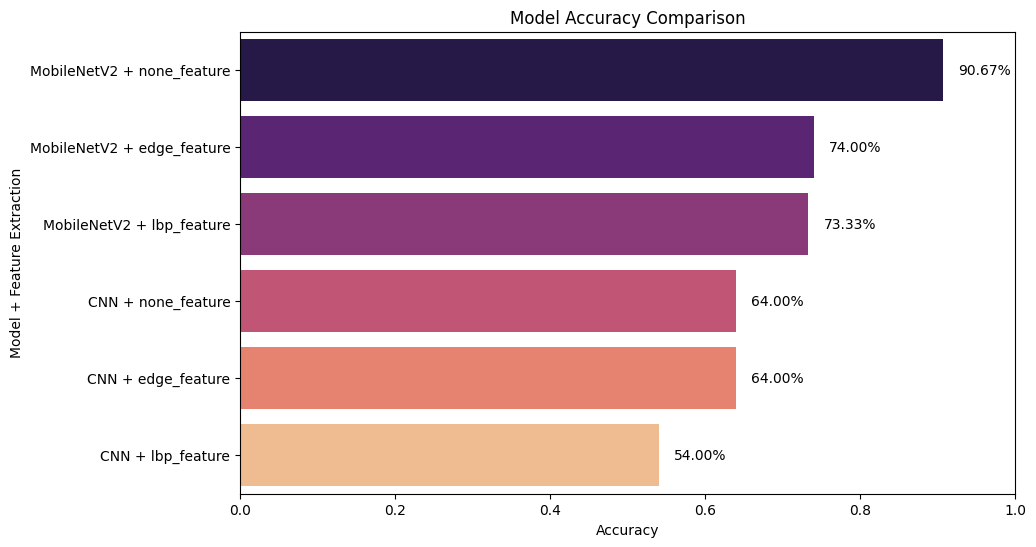

In [15]:
# Plotting model accuracy comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x='Accuracy', y=results_df['Model'] + ' + ' + results_df['Feature Extraction'], palette='magma')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model + Feature Extraction')
plt.xlim(0, 1)

# Add accuracy labels on the bars with increased space and % sign
for p in ax.patches:
    ax.annotate(f'{p.get_width()*100:.2f}%',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                color='black',
                fontsize=10,
                xytext=(30, 0),  # Increased space
                textcoords='offset points')

plt.show()

**Let us use the best model to create a simple web-based application where users can upload an image and receive a prediction about whether the image depicts a biodegradable or non-biodegradable item. This will help demonstrate the model's capability in classifying images using a user-friendly interface.**

In [17]:
# --- Make interface for prediction (Hosted website already created, this code will run a temporary hosted website)---
model_path = '/content/mobilenetv2_model_none_feature.h5'  # Path to the saved MobileNetV2 model
model = tf.keras.models.load_model(model_path)

# Define class names (update according to your specific dataset)
class_names = ['BIODEGRADABLE', 'NON-BIODEGRADABLE']

# Define preprocessing function
def preprocess_image(img):
    img = img.convert('L')  # Convert image to grayscale
    img = img.resize((224, 224))  # Adjust to MobileNetV2's input size (224x224)
    img_array = np.array(img) / 255.0  # Normalize to [0, 1] range
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (224, 224, 1)
    img_array = np.repeat(img_array, 3, axis=-1)  # Repeat channels to match expected input shape (224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)
    return img_array

# Define prediction function
def predict(image):
    img_array = preprocess_image(image)
    preds = model.predict(img_array)

    # Interpret prediction correctly
    predicted_class = class_names[int(preds[0] > 0.5)]  # If preds > 0.5, it's class 1 (NON-BIODEGRADABLE)

    return predicted_class

# Set up the Gradio interface using the new API
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),  # Handle PIL image directly
    outputs="text",
    title="Trash Classification (Developed by: Heroshi)",
    description="Upload an image to get the predicted class (BIODEGRADABLE or NON-BIODEGRADABLE)."
)

# Launch the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://063b988525ca9df76e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Conclusion**

This study highlights the effectiveness of MobileNetV2 for trash image classification, particularly when relying on the model's inherent feature learning capabilities. Our findings suggest that investing in high-quality datasets and leveraging the power of pre-trained CNN architectures like MobileNetV2 can lead to accurate and efficient trash classification systems. This research contributes to the development of automated waste management solutions, promoting environmental sustainability and resource conservation.